# **Feature Engineering**

## Objectives

* Will take the cleaned dataset and check if there are any outliers for each country. Will also make a new dataframe that has the average rate of increase for each country

## Inputs

* cleaned_data.csv 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [55]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone'

In [56]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [57]:
# Load the cleaned data
cleaned_data_path = 'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone\\cleaned_data.csv'
cleaned_data = pd.read_csv(cleaned_data_path)

# Display the first few rows of the dataframe
print(cleaned_data.head())

  Country ISO3    Country  Year ISIC Division  \
0          ARG  Argentina  2000         10-12   
1          ARG  Argentina  2000         13-15   
2          ARG  Argentina  2000            16   
3          ARG  Argentina  2000         17-18   
4          ARG  Argentina  2000            19   

                                  ISIC Division Desc         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value LCU (million national currency)  Value USD (million USD)  
0                               16986.10                  16994.6  
1                                5944.13                   5947.1  
2                                1551.72                   1552.5  


---

## Feature engineering

Now let us adjust some of the column names we have to make it easier for our analysis

In [59]:
# Make a copy of cleaned_data
df_eng = cleaned_data.copy()

# Rename columns
df_eng.rename(columns={
    'Country ISO3': 'ISO3',
    'ISIC Division': 'Ind Code',
    'ISIC Division Desc': 'Industry',
    'Value LCU (million national currency)': 'Value (LCU)',
    'Value USD (million USD)': 'Value (USD)'
}, inplace=True)

print(df_eng.head())

  ISO3    Country  Year Ind Code  \
0  ARG  Argentina  2000    10-12   
1  ARG  Argentina  2000    13-15   
2  ARG  Argentina  2000       16   
3  ARG  Argentina  2000    17-18   
4  ARG  Argentina  2000       19   

                                            Industry         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value (LCU)  Value (USD)  
0     16986.10      16994.6  
1      5944.13       5947.1  
2      1551.72       1552.5  
3      4567.81       4570.1  
4      2938.13       2939.6  


In [60]:
# Check to see the names of the industries
unique_measures = df_eng['Industry'].unique()
print(unique_measures)

['Manufacture of food products, beverages and tobacco products'
 'Manufacture of textiles, wearing apparel, leather and related products'
 'Manufacture of wood and of products of wood and cork, except furniture; manufacture of articles of straw and plaiting materials'
 'Manufacture of paper products and printing'
 'Manufacture of coke and refined petroleum products'
 'Manufacturing of chemicals and pharmaceutical products'
 'Manufacture of rubber and plastics products'
 'Manufacture of other non-metallic mineral products'
 'Manufacture of basic metals'
 'Manufacture of fabricated metal products, machinery and equipment'
 'Manufacture of transport equipment'
 'Manufacture of furniture, other manufacturing']


Looking at the data, there isn't any obvious short form words or abbreviations I can use to describe each industry so I will just be using the letters A-L, and the user can refer to a reference list to see what each letter represents

In [61]:
# Check the values of Ind Code column
unique_measures = df_eng['Ind Code'].unique()
print(unique_measures)

['10-12' '13-15' '16' '17-18' '19' '20-21' '22' '23' '24' '25-28' '29-30'
 '31-32']


In [62]:
# Mapping dictionary
ind_code_mapping = {
    '10-12': 'A',
    '13-15': 'B',
    '16': 'C',
    '17-18': 'D',
    '19': 'E',
    '20-21': 'F',
    '22': 'G',
    '23': 'H',
    '24': 'I',
    '25-28': 'J',
    '29-30': 'K',
    '31-32': 'L'
}

# Replace 'Div Code' values
df_eng['Ind Code'] = df_eng['Ind Code'].replace(ind_code_mapping)

print(df_eng.head())

  ISO3    Country  Year Ind Code  \
0  ARG  Argentina  2000        A   
1  ARG  Argentina  2000        B   
2  ARG  Argentina  2000        C   
3  ARG  Argentina  2000        D   
4  ARG  Argentina  2000        E   

                                            Industry         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value (LCU)  Value (USD)  
0     16986.10      16994.6  
1      5944.13       5947.1  
2      1551.72       1552.5  
3      4567.81       4570.1  
4      2938.13       2939.6  


In [65]:
unique_measures = df_eng['Ind Code'].unique()
print(unique_measures)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L']


I want to add a new column that shows indicates which continent the country is from. This will be useful later when we want to compare for example Europe vs America 

In [70]:
df_eng['Country'].unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Cambodia', 'Canada', 'Chile',
       'China', 'Chinese Taipei', 'Colombia', 'Costa Rica', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland',
       'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Kazakhstan',
       'Korea', 'Laos', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia',
       'Malta', 'Mexico', 'Morocco', 'Myanmar', 'Netherlands',
       'New Zealand', 'North Macedonia', 'Norway', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Serbia', 'Singapore', 'Slovak Republic',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Tunisia', 'Turkey', 'United Kingdom', 'United States',
       'Viet Nam'], dtype=object)

In [69]:
df_eng = df_eng.sort_values(by=['Country', 'Year'])


In [71]:
# Mapping dictionary for countries to continents
country_to_continent = {
    'Argentina': 'South America', 
    'Australia': 'Oceania', 
    'Austria': 'Europe', 
    'Belgium': 'Europe', 
    'Brazil': 'South America',
    'Brunei Darussalam': 'Asia', 
    'Bulgaria': 'South America', 
    'Cambodia': 'South America', 
    'Canada': 'North America', 
    'Chile': 'South America',
    'China': 'Asia',
    'Chinese Taipei': 'Asia', 
    'Colombia': 'South America', 
    'Costa Rica': 'South America', 
    'Croatia': 'Europe', 
    'Cyprus': 'Europe',
    'Czech Republic': 'Europe', 
    'Denmark': 'Europe', 
    'Estonia': 'Europe', 
    'Finland': 'Europe', 
    'France': 'Europe',
    'Germany': 'Europe', 
    'Greece': 'Europe', 
    'Hong Kong': 'Asia', 
    'Hungary': 'Europe', 
    'Iceland': 'Europe', 
    'India': 'Asia',
    'Indonesia': 'Asia', 
    'Ireland': 'Europe', 
    'Italy': 'Europe', 
    'Japan': 'Asia', 
    'Kazakhstan': 'Asia',
    'Korea': 'Asia', 
    'Laos': 'Asia', 
    'Latvia': 'Europe', 
    'Lithuania': 'Europe', 
    'Luxembourg': 'Europe', 
    'Malaysia': 'Asia',
    'Malta': 'Europe', 
    'Mexico': 'South America', 
    'Morocco': 'Africa', 
    'Myanmar': 'Asia', 
    'New Zealand': 'Oceania',
    'North Macedonia': 'Europe', 
    'Norway': 'Europe', 
    'Peru': 'South America',
    'Philippines': 'Asia', 
    'Poland': 'Europe', 
    'Portugal': 'Europe', 
    'Romania': 'Europe',
    'Russian Federation': 'Europe', 
    'Saudi Arabia': 'Middle East', 
    'Serbia': 'Europe', 
    'Singapore': 'Asia',
    'Slovak Republic': 'Europe', 
    'Slovenia': 'Europe', 
    'South Africa': 'Africa', 
    'Spain': 'Europe', 
    'Sweden': 'Europe',
    'Switzerland': 'Europe', 
    'Thailand': 'Asia', 
    'The Netherlands': 'Europe', 
    'Tunisia': 'Africa', 
    'Turkey': 'Middle East',
    'United Kingdom': 'Europe', 
    'United States': 'North America', 
    'Viet Nam': 'Asia'
}

# Add 'Continent' column to df_eng
df_eng['Continent'] = df_eng['Country'].map(country_to_continent)

print(df_eng.head())

  ISO3    Country  Year Ind Code  \
0  ARG  Argentina  2000        A   
1  ARG  Argentina  2000        B   
2  ARG  Argentina  2000        C   
3  ARG  Argentina  2000        D   
4  ARG  Argentina  2000        E   

                                            Industry         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value (LCU)  Value (USD)      Continent  
0     16986.10      16994.6  South America  
1      5944.13       5947.1  South America  
2      1551.72       1552.5  South America  
3      4567.81       4570.1  South America  
4      2938.13       2939.6  South America  


Let re-order the columns to make it look more logical

In [72]:
# Order of the columns
desired_order = ['Year','Country', 'ISO3', 'Continent', 'Ind Code', 'Industry','Measure','Value (LCU)','Value (USD)']

# Reorder the columns
df_eng = df_eng[desired_order]

# Print the DataFrame to verify the new order
print(df_eng.head())

   Year    Country ISO3      Continent Ind Code  \
0  2000  Argentina  ARG  South America        A   
1  2000  Argentina  ARG  South America        B   
2  2000  Argentina  ARG  South America        C   
3  2000  Argentina  ARG  South America        D   
4  2000  Argentina  ARG  South America        E   

                                            Industry         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value (LCU)  Value (USD)  
0     16986.10      16994.6  
1      5944.13       5947.1  
2      1551.72       1552.5  
3      4567.81       4570.1  
4      2938.13       2939.6  


---

### Exchange rate

We want to add an extra column to our dataset that has the exchange rate for each country in that specific year. This is essential in explaining the data. Growth in an industry might be due to a more favourable exchange rate rather than genuine economic growth. We'll make a function that can calculate this field

In [73]:
def exchange_rate_column(df, usd_column, lcu_column, new_column_name='Exchange Rate'):
    """
    Creates an exchange rate column in a Pandas DataFrame.

    Args:
        df: Pandas DataFrame containing USD and LCU columns.
        usd_column: Name of the column containing USD values.
        lcu_column: Name of the column containing LCU values.
        new_column_name: Name for the new exchange rate column.

    Returns:
        Pandas DataFrame with the new exchange rate column.
    """

    df = df.copy() #important to avoid changing the original dataframe.

    try:
        df[new_column_name] = df[usd_column] / df[lcu_column]
    except ZeroDivisionError:
        print("Warning: Division by zero encountered. Ensure LCU column does not contain zeros.")
        df[new_column_name] = None # Or some other handling of the error.
    except KeyError as e:
        print(f"Error: Column '{e}' not found in DataFrame.")
        return None #or handle the error in an appropriate way.

    return df

In [74]:
df_eng2 = exchange_rate_column(df_eng, 'Value (USD)', 'Value (LCU)')
print(df_eng2.head())

   Year    Country ISO3      Continent Ind Code  \
0  2000  Argentina  ARG  South America        A   
1  2000  Argentina  ARG  South America        B   
2  2000  Argentina  ARG  South America        C   
3  2000  Argentina  ARG  South America        D   
4  2000  Argentina  ARG  South America        E   

                                            Industry         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value (LCU)  Value (USD)  Exchange Rate  
0     16986.10      16994.6       1.000500  
1      5944.13       5947.1       1.000500  
2      1551.72       1552.5       1.000503  
3      4567.81       4570.1       1.000501  
4      2938.13       2939.6       1

For ease of use, we'll make a dataframe that has the Industry Codes and Industry, so we can produce it as a handy table throughout the EDA as a reference for the reader 

In [77]:
# Create a DataFrame with Ind Code and Industry
industry_reference = df_eng[['Ind Code', 'Industry']].drop_duplicates().reset_index(drop=True)

# Display the DataFrame
industry_reference

,Ind Code,Industry
0,A,"Manufacture of food products, beverages and to..."
1,B,"Manufacture of textiles, wearing apparel, leat..."
2,C,Manufacture of wood and of products of wood an...
3,D,Manufacture of paper products and printing
4,E,Manufacture of coke and refined petroleum prod...
5,F,Manufacturing of chemicals and pharmaceutical ...
6,G,Manufacture of rubber and plastics products
7,H,Manufacture of other non-metallic mineral prod...
8,I,Manufacture of basic metals
9,J,"Manufacture of fabricated metal products, mach..."


---

## Volatility

We shall add a column for volatility. This is measured by calculating the standard deviation(std) of the exhange rate. A high volatility/std means the exhange rate was unstable which can introduce higher risks for USD based investors

In [78]:
# Calculate Volatility
df_eng2["Volatility"] = df_eng2.groupby('Country')['Exchange Rate'].transform(lambda x: x.std())


c:\Users\sayed\OneDrive\Documents\Code institute\Capstone\Capstone\.venv\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [20]:
print(df_eng2.head())

   Year    Country ISO3      Continent Ind Code  \
0  2000  Argentina  ARG  South America        A   
1  2000  Argentina  ARG  South America        B   
2  2000  Argentina  ARG  South America        C   
3  2000  Argentina  ARG  South America        D   
4  2000  Argentina  ARG  South America        E   

                                            Industry         Measure  \
0  Manufacture of food products, beverages and to...  Current prices   
1  Manufacture of textiles, wearing apparel, leat...  Current prices   
2  Manufacture of wood and of products of wood an...  Current prices   
3         Manufacture of paper products and printing  Current prices   
4  Manufacture of coke and refined petroleum prod...  Current prices   

   Value (LCU)  Value (USD)  Exchange Rate  Volatility  
0     16986.10      16994.6       1.000500    0.258391  
1      5944.13       5947.1       1.000500    0.258391  
2      1551.72       1552.5       1.000503    0.258391  
3      4567.81       4570.1     

count    6.600000e+01
mean     6.495221e-02
std      6.739757e-02
min      6.624372e-08
25%      2.471730e-03
50%      3.293307e-02
75%      1.193092e-01
max      2.863135e-01
Name: Volatility, dtype: float64


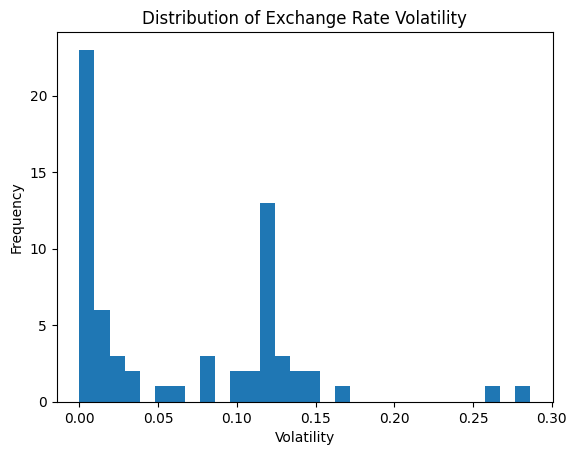

Chosen Volatility Threshold: 0.13460686623563733


In [79]:
import matplotlib.pyplot as plt

# Examine the Distribution of Volatility
volatility_distribution = df_eng2.groupby('Country')['Volatility'].first()
print(volatility_distribution.describe())

# Plot the Distribution
plt.hist(volatility_distribution, bins=30)
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.title('Distribution of Exchange Rate Volatility')
plt.show()

# Set a Threshold (e.g., exclude top 10% of countries with highest volatility)
threshold = volatility_distribution.quantile(0.90)
print(f"Chosen Volatility Threshold: {threshold}")

Data rows with a threshold higher than 0.135 will be removed

In [80]:
# Filter for Stable Exchange Rates
threshold = 0.135  # Example threshold
stable_countries = df_eng2[df_eng2["Volatility"] < threshold]["Country"].unique()
df_stable = df_eng2[df_eng2["Country"].isin(stable_countries)]
print(df_stable.head())

     Year  Country ISO3 Continent Ind Code  \
418  2000  Austria  AUT    Europe        A   
419  2000  Austria  AUT    Europe        B   
420  2000  Austria  AUT    Europe        C   
421  2000  Austria  AUT    Europe        D   
422  2000  Austria  AUT    Europe        E   

                                              Industry         Measure  \
418  Manufacture of food products, beverages and to...  Current prices   
419  Manufacture of textiles, wearing apparel, leat...  Current prices   
420  Manufacture of wood and of products of wood an...  Current prices   
421         Manufacture of paper products and printing  Current prices   
422  Manufacture of coke and refined petroleum prod...  Current prices   

     Value (LCU)  Value (USD)  Exchange Rate  Volatility  
418      3931.90      3631.55       0.923612    0.117874  
419      1605.22      1482.60       0.923612    0.117874  
420      1702.97      1572.88       0.923610    0.117874  
421      3282.55      3031.80       0.9236

In [81]:
missing_data_df_stable = df_stable.isnull().sum()
print(missing_data_df_stable)

Year               0
Country            0
ISO3               0
Continent        504
Ind Code           0
Industry           0
Measure            0
Value (LCU)        0
Value (USD)        0
Exchange Rate     34
Volatility         0
dtype: int64


In [120]:
df_eng_final = df_stable.dropna()
null = df_eng_final.isnull().sum()
print(null)

Year             0
Country          0
ISO3             0
Continent        0
Ind Code         0
Industry         0
Measure          0
Value (LCU)      0
Value (USD)      0
Exchange Rate    0
Volatility       0
dtype: int64


In [116]:
# Filter df_eng_final to include only rows with 'Current prices' in the Measure column
df_eng_curr = df_eng_final[df_eng_final['Measure'] == 'Current prices']

df_eng_curr['Measure'].unique()

array(['Current prices'], dtype=object)

In [117]:
# Filter df_eng_final to include only rows with 'Constant 2015 prices' in the Measure column
df_eng_const = df_eng_final[df_eng_final['Measure'] == 'Constant 2015 prices']

df_eng_const['Measure'].unique()

array(['Constant 2015 prices'], dtype=object)

---

## GDP Engineering

We already made some adjustments to the GDP file, but it needs to be engineered a bit more before we can use it for our analysis.

In [91]:
# Load the GDP cleaned data
gdp_cleaned_path = 'c:\\Users\\sayed\\OneDrive\\Documents\\Code institute\\Capstone\\Capstone\\gdp_cleaned.csv'
gdp_cleaned = pd.read_csv(gdp_cleaned_path)

# Display the first few rows of the dataframe
print(gdp_cleaned.head(1))

                       Country ISO3      1999      2000      2001      2002  \
0  Africa Eastern and Southern  AFE  265429.0  287202.0  260992.0  267815.0   

       2003      2004      2005      2006  ...      2012      2013      2014  \
0  355716.0  442696.0  516661.0  580241.0  ...  952999.0  962395.0  978708.0   

       2015      2016      2017       2018       2019      2020       2021  
0  898278.0  828943.0  972999.0  1012310.0  1009720.0  933392.0  1085750.0  

[1 rows x 25 columns]


In [92]:
# Make a copy of gdp_cleaned
gdp_copy = gdp_cleaned.copy()

# Get the list of ISO3 codes in df_eng_curr
iso3_codes = df_eng_curr['ISO3'].unique()

# Filter gdp_copy to keep only the columns where ISO3 codes are in both datasets
gdp_copy = gdp_copy[gdp_copy['ISO3'].isin(iso3_codes)]

print(gdp_copy.head(2))

   Country ISO3      1999      2000      2001      2002      2003      2004  \
3  Austria  AUT  216422.0  196182.0  196477.0  212837.0  260780.0  299210.0   
5  Belgium  BEL  258246.0  236792.0  236746.0  258384.0  318083.0  369215.0   

       2005      2006  ...      2012      2013      2014      2015      2016  \
3  313952.0  333906.0  ...  406750.0  426581.0  438556.0  379546.0  393687.0   
5  385715.0  408260.0  ...  498414.0  524097.0  537987.0  461045.0  474272.0   

       2017      2018      2019      2020      2021  
3  414926.0  452582.0  442984.0  434398.0  480467.0  
5  500909.0  542639.0  536726.0  529694.0  598494.0  

[2 rows x 25 columns]


We shall remove the last 3 columns from our data as we don't have the latest Value (USD) for some of the major countries like China

In [93]:
# Remove the last three columns from gdp_copy
gdp_copy = gdp_copy.iloc[:, :-3]

# Display the first few rows of the modified dataframe
print(gdp_copy.columns)

Index(['Country', 'ISO3', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


We want to reshape our database so it's suitable for visualistion later. At the moment the year is in long format and we need it in wide format.

In [122]:
# Identify year columns
year_columns = [str(year) for year in range(2000, 2019)]

# Melt (unpivot) the year columns
gdp_pivot = pd.melt(gdp_copy, id_vars=['Country', 'ISO3'], value_vars=year_columns,
var_name='Year', value_name='GDP')

# Convert 'Year' to integer
gdp_pivot['Year'] = gdp_pivot['Year'].astype(int)

# Sort the DataFrame
gdp_pivot = gdp_pivot.sort_values(by=['Country', 'Year'])

#Reset the index.
gdp_pivot = gdp_pivot.reset_index(drop=True)

# Display the first few rows of the modified dataframe
print(gdp_pivot.head(2))

   Country ISO3  Year       GDP
0  Austria  AUT  2000  196182.0
1  Austria  AUT  2001  196477.0


---

In [126]:
# Export df_eng_final to CSV
df_eng_final.to_csv('df_eng_final.csv', index=False)

# Export industry_reference to CSV
industry_reference.to_csv('industry_reference.csv', index=False)

# Export df_eng_curr to CSV
df_eng_curr.to_csv('df_eng_curr.csv', index=False)

# Export df_eng_const to CSV
df_eng_const.to_csv('df_eng_const.csv', index=False)

# export gdp pivot to csv
gdp_pivot.to_csv('gdp_pivot.csv', index=False)